In [1]:
import cv2, numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:

def visualize_colors(cluster, centroids):

    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()
    
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    
    
    
    plt.pie([percent[0] for percent in colors],colors = [color[1]/255 for color in colors ])
    
    
    return rect





[216.44849618 192.60043634 148.84276142] 4.65%
[127.52929494 151.49918988  28.36638269] 13.84%
[235.92408555 179.3569125   20.6494526 ] 17.06%
[173.40362375  51.12226016  31.94558872] 26.33%
[69.30036951 36.66052722 26.27301817] 38.12%


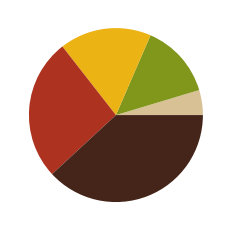

In [3]:
image = cv2.imread(r"C:\Users\shiva\OneDrive\Pictures\Saved Pictures\skittles.jfif")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))


cluster = KMeans(n_clusters=5).fit(reshape)
visualize = visualize_colors(cluster, cluster.cluster_centers_)

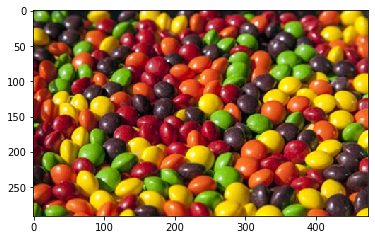

In [4]:
plt.imshow(image);

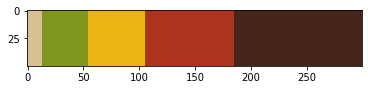

In [5]:
plt.imshow(visualize);